# Bank Customer DataSet

## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model 
import seaborn as sns
from google.colab import files
import io 
from sklearn.metrics import confusion_matrix, accuracy_score

## Import Data

In [32]:
datos = files.upload()

Saving BankCustomerData.csv to BankCustomerData (1).csv


In [116]:
data_bank = pd.read_csv(io.BytesIO(datos['BankCustomerData.csv']))
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


## Knowing the Data

In [117]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           42639 non-null  int64 
 1   job           42639 non-null  object
 2   marital       42639 non-null  object
 3   education     42639 non-null  object
 4   default       42639 non-null  object
 5   balance       42639 non-null  int64 
 6   housing       42639 non-null  object
 7   loan          42639 non-null  object
 8   contact       42639 non-null  object
 9   day           42639 non-null  int64 
 10  month         42639 non-null  object
 11  duration      42639 non-null  int64 
 12  campaign      42639 non-null  int64 
 13  pdays         42639 non-null  int64 
 14  previous      42639 non-null  int64 
 15  poutcome      42639 non-null  object
 16  term_deposit  42639 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.5+ MB


In [118]:
data_bank.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

## Data transformation

In [119]:
data_bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

## Job (Object to Int)

In [120]:
values_job = {'job':{'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4, 'unknown':5, 'retired':6,'admin.':7, 'services':8, 'self-employed':9, 'unemployed':10, 'housemaid':11, 'student':12 }}
data_bank.replace(values_job, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,2,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,5,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,6,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,4,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,12,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [121]:
data_bank['job'] = pd.to_numeric(data_bank['job'], errors='coerce')

## Marital (Object to Int)

In [122]:
data_bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [123]:
values_marital = {'marital':{'married':1, 'single':2, 'divorced':3}}
data_bank.replace(values_marital, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,2,2,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,5,2,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,6,1,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,4,1,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,12,2,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [124]:
data_bank['marital'] = pd.to_numeric(data_bank['marital'], errors='coerce')

## Education (Object to int)

In [125]:
data_bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [126]:
values_education = {'education':{'tertiary':1, 'secondary':2, 'unknown':3, 'primary':4 }}
data_bank.replace(values_education, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,2,2,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,1,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,1,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,5,2,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,6,1,4,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,4,1,4,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,12,2,2,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [127]:
data_bank['education'] = pd.to_numeric(data_bank['education'],errors='coerce')

## Default (Object to Int)

In [128]:
data_bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [129]:
values_default = {'default':{'no':1, 'yes':2 }}
data_bank.replace(values_default, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,1,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,2,2,2,1,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,1,2,1,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,1,3,1,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,5,2,3,1,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,1,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,6,1,4,1,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,4,1,4,1,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,12,2,2,1,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [131]:
data_bank['default'] = pd.to_numeric(data_bank['default'], errors='coerce')

## Hounsing (Object to Int)

In [132]:
data_bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [133]:
values_housing = {'housing':{'yes':1, 'no':2 }}
data_bank.replace(values_housing, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,1,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,2,2,2,1,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,1,2,1,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,1,3,1,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,5,2,3,1,1,2,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,1,2488,2,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,6,1,4,1,2190,2,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,4,1,4,1,6718,2,no,cellular,13,jan,278,4,97,1,other,no
42637,22,12,2,2,1,254,2,no,cellular,13,jan,143,2,-1,0,unknown,yes


In [134]:
data_bank['housing']= pd.to_numeric(data_bank['housing'], errors='coerce')

## Loan (Object to Int)

In [135]:
data_bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [136]:
values_loan = {'loan':{'no':1, 'yes':2 }}
data_bank.replace(values_loan, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,1,2143,1,1,unknown,5,may,261,1,-1,0,unknown,no
1,44,2,2,2,1,29,1,1,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,1,2,1,2,1,2,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,1,3,1,1506,1,1,unknown,5,may,92,1,-1,0,unknown,no
4,33,5,2,3,1,1,2,1,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,1,2488,2,1,telephone,12,jan,661,2,92,1,success,yes
42635,87,6,1,4,1,2190,2,1,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,4,1,4,1,6718,2,1,cellular,13,jan,278,4,97,1,other,no
42637,22,12,2,2,1,254,2,1,cellular,13,jan,143,2,-1,0,unknown,yes


In [137]:
data_bank['loan']= pd.to_numeric(data_bank['loan'], errors='coerce')

## Contact (Object to Int)

In [138]:
data_bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [139]:
values_contact = {'contact':{'unknown':1, 'cellular':2, 'telephone':3}}
data_bank.replace(values_contact, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,1,2143,1,1,1,5,may,261,1,-1,0,unknown,no
1,44,2,2,2,1,29,1,1,1,5,may,151,1,-1,0,unknown,no
2,33,3,1,2,1,2,1,2,1,5,may,76,1,-1,0,unknown,no
3,47,4,1,3,1,1506,1,1,1,5,may,92,1,-1,0,unknown,no
4,33,5,2,3,1,1,2,1,1,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,1,2488,2,1,3,12,jan,661,2,92,1,success,yes
42635,87,6,1,4,1,2190,2,1,3,12,jan,512,2,-1,0,unknown,yes
42636,34,4,1,4,1,6718,2,1,2,13,jan,278,4,97,1,other,no
42637,22,12,2,2,1,254,2,1,2,13,jan,143,2,-1,0,unknown,yes


In [140]:
data_bank['contact']= pd.to_numeric(data_bank['contact'], errors='coerce')

## Month (Object to Int)

In [141]:
data_bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [142]:
values_month = {'month':{'may':1, 'jun':2, 'jul':3 ,'aug':4, 'oct':5, 'nov':6, 'dec':7, 'jan':8, 'feb':9, 'mar':10, 'apr':11, 'sep':12}}
data_bank.replace(values_month, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,1,2143,1,1,1,5,1,261,1,-1,0,unknown,no
1,44,2,2,2,1,29,1,1,1,5,1,151,1,-1,0,unknown,no
2,33,3,1,2,1,2,1,2,1,5,1,76,1,-1,0,unknown,no
3,47,4,1,3,1,1506,1,1,1,5,1,92,1,-1,0,unknown,no
4,33,5,2,3,1,1,2,1,1,5,1,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,1,2488,2,1,3,12,8,661,2,92,1,success,yes
42635,87,6,1,4,1,2190,2,1,3,12,8,512,2,-1,0,unknown,yes
42636,34,4,1,4,1,6718,2,1,2,13,8,278,4,97,1,other,no
42637,22,12,2,2,1,254,2,1,2,13,8,143,2,-1,0,unknown,yes


In [143]:
data_bank['month']=pd.to_numeric(data_bank['month'], errors='coerce')

## Poutcome (Object to Int)

In [144]:
data_bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [145]:
values_poutcome = {'poutcome':{'unknown':1, 'failure':2, 'other':3 ,'success':4}}
data_bank.replace(values_poutcome, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,1,2143,1,1,1,5,1,261,1,-1,0,1,no
1,44,2,2,2,1,29,1,1,1,5,1,151,1,-1,0,1,no
2,33,3,1,2,1,2,1,2,1,5,1,76,1,-1,0,1,no
3,47,4,1,3,1,1506,1,1,1,5,1,92,1,-1,0,1,no
4,33,5,2,3,1,1,2,1,1,5,1,198,1,-1,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,1,2488,2,1,3,12,8,661,2,92,1,4,yes
42635,87,6,1,4,1,2190,2,1,3,12,8,512,2,-1,0,1,yes
42636,34,4,1,4,1,6718,2,1,2,13,8,278,4,97,1,3,no
42637,22,12,2,2,1,254,2,1,2,13,8,143,2,-1,0,1,yes


In [146]:
data_bank['poutcome']=pd.to_numeric(data_bank['poutcome'], errors='coerce')

## Term_deposit (Object to int)

In [147]:
data_bank['term_deposit'].unique()

array(['no', 'yes'], dtype=object)

In [148]:
values_term_deposit = {'term_deposit':{'no':1, 'yes':2}}
data_bank.replace(values_term_deposit, inplace=True)
data_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,1,1,1,1,2143,1,1,1,5,1,261,1,-1,0,1,1
1,44,2,2,2,1,29,1,1,1,5,1,151,1,-1,0,1,1
2,33,3,1,2,1,2,1,2,1,5,1,76,1,-1,0,1,1
3,47,4,1,3,1,1506,1,1,1,5,1,92,1,-1,0,1,1
4,33,5,2,3,1,1,2,1,1,5,1,198,1,-1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,12,2,2,1,2488,2,1,3,12,8,661,2,92,1,4,2
42635,87,6,1,4,1,2190,2,1,3,12,8,512,2,-1,0,1,2
42636,34,4,1,4,1,6718,2,1,2,13,8,278,4,97,1,3,1
42637,22,12,2,2,1,254,2,1,2,13,8,143,2,-1,0,1,2


In [149]:
data_bank['term_deposit']= pd.to_numeric(data_bank['term_deposit'], errors='coerce')

## Data verification

In [150]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42639 entries, 0 to 42638
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           42639 non-null  int64
 1   job           42639 non-null  int64
 2   marital       42639 non-null  int64
 3   education     42639 non-null  int64
 4   default       42639 non-null  int64
 5   balance       42639 non-null  int64
 6   housing       42639 non-null  int64
 7   loan          42639 non-null  int64
 8   contact       42639 non-null  int64
 9   day           42639 non-null  int64
 10  month         42639 non-null  int64
 11  duration      42639 non-null  int64
 12  campaign      42639 non-null  int64
 13  pdays         42639 non-null  int64
 14  previous      42639 non-null  int64
 15  poutcome      42639 non-null  int64
 16  term_deposit  42639 non-null  int64
dtypes: int64(17)
memory usage: 5.5 MB


In [151]:
data_bank.apply(lambda x: len(x.unique()))

age               75
job               12
marital            3
education          4
default            2
balance         7078
housing            2
loan               2
contact            3
day               31
month             12
duration        1561
campaign          48
pdays            418
previous          38
poutcome           4
term_deposit       2
dtype: int64

In [152]:
data_bank= data_bank.drop(['day','month','pdays','poutcome','previous','campaign','duration'], axis=1)
data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,term_deposit
0,58,1,1,1,1,2143,1,1,1,1
1,44,2,2,2,1,29,1,1,1,1
2,33,3,1,2,1,2,1,2,1,1
3,47,4,1,3,1,1506,1,1,1,1
4,33,5,2,3,1,1,2,1,1,1


## Graficas

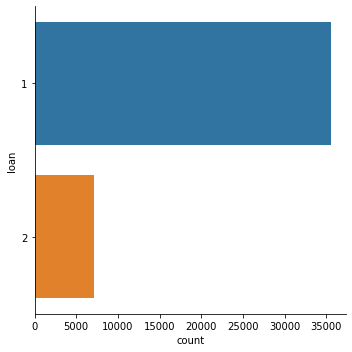

In [153]:
g = sns.catplot(y = 'loan', data=data_bank, kind='count')

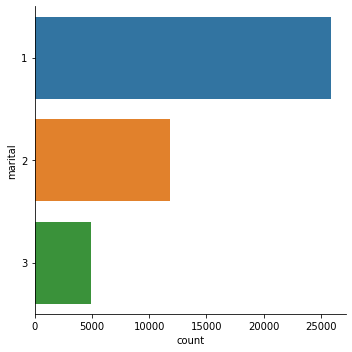

In [154]:
g = sns.catplot(y = 'marital', data=data_bank, kind='count')

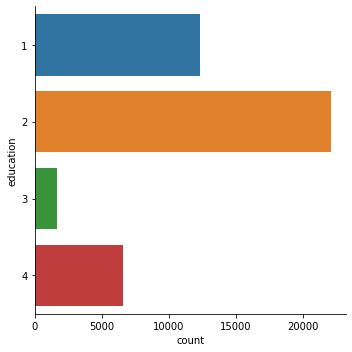

In [155]:
g = sns.catplot(y = 'education', data=data_bank, kind='count')


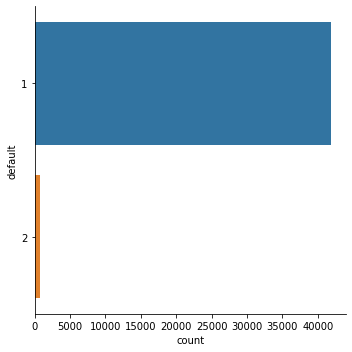

In [156]:
g = sns.catplot(y = 'default', data=data_bank, kind='count')


[Text(0.5, 1.0, 'Loan vs default')]

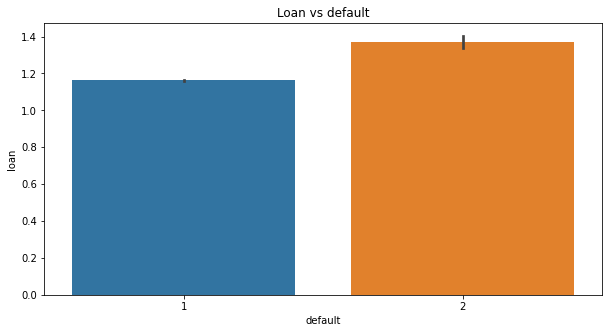

In [157]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=data_bank, x='default', y='loan', ax=ax)
ax.set(title='Loan vs default')

### Grafica de Correlacion

[Text(0.5, 1.0, 'loan vs balance')]

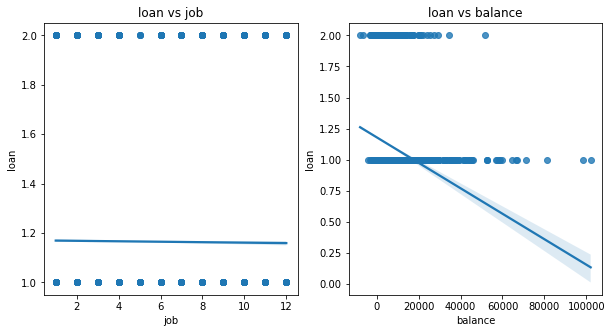

In [158]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(10,5))
sns.regplot(data = data_bank, y='loan', x='job',ax = ax1)
ax1.set(title='loan vs job')

sns.regplot(data = data_bank, y='loan', x='balance', ax= ax2)
ax2.set(title='loan vs balance') 

[Text(0.5, 1.0, 'loan vs balance')]

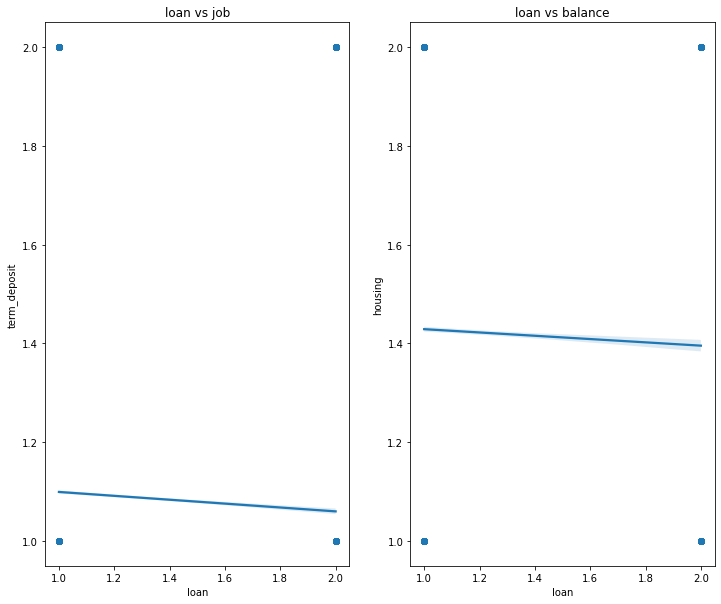

In [159]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,10))
sns.regplot(data = data_bank, x='loan', y='term_deposit',ax = ax1)
ax1.set(title='loan vs job')

sns.regplot(data = data_bank, x='loan', y='housing', ax= ax2)
ax2.set(title='loan vs balance') 

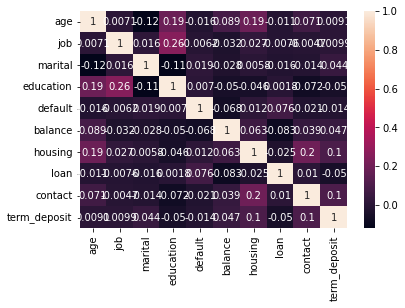

In [160]:
correlacion = data_bank.corr()
sns.heatmap(correlacion, annot=True)
plt.show()

In [113]:
#cols =['age','job', 'marital','education', 'default', 'balance', 'housing', 'loan', 'contact','term_deposit']
#for col in cols:
#  data_bank[col]=data_bank[col].astype('category')
#data_bank.info()

## Prepare Data

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [162]:
x = data_bank.drop(columns='loan')
y = data_bank['loan']

## train y test

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Aplicar modelo de regresión logística

### Instanciacion de Modelos

In [165]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Precisión por Regresión Logística: ', model.score(x_train, y_train))
print('Exactitud: ', accuracy_score(y_test, y_pred)*100)

Precisión por Regresión Logística:  0.8336900120195831
Exactitud:  83.44277673545967


### Grafica de Regresion Logistica

[[7116    0]
 [1412    0]]


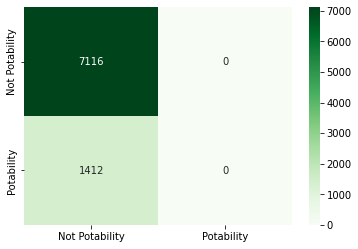

In [167]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Greens')
plt.show()

### Arboles de Decision

In [187]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=10, splitter='best')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Precisión por Árboles de Decisión: ', model2.score(x_train,y_train))
print('Precisión de las pruebas: ', model2.score(x_test, y_test)*100)

Precisión por Árboles de Decisión:  0.845064641904371
Precisión de las pruebas:  83.07926829268293


Profundidad del Arbol: 10
Numero de nodos terminales: 388


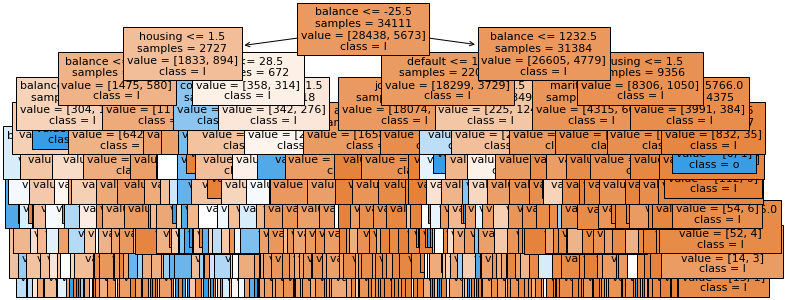

In [184]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12,5))
print(f'Profundidad del Arbol: {model2.get_depth()}')
print(f'Numero de nodos terminales: {model2.get_n_leaves()}')

tree = tree.plot_tree(
    decision_tree = model2, 
    feature_names = data_bank.drop(columns='loan').columns,
    class_names ='loan',
    filled = True,
    impurity = False,
    fontsize = 11,
    precision = 2,
    ax = ax
)

Matriz de Confusión
[[6851  265]
 [1274  138]]


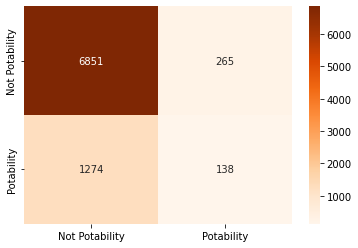

In [194]:
matriz2 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz2)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz2.flatten()/np.sum(matriz2)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(matriz2, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Oranges')
plt.show()

## Support Vector Machine

In [188]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print('Precisión por Support Vector Machines: ', model3.score(x_train, y_train))
print('Precisión de las pruebas: ', model3.score(x_test, y_test)*100)

Precisión por Support Vector Machines:  0.8337486441323914
Precisión de las pruebas:  83.44277673545967


Matriz de Confusión
[[6851  265]
 [1274  138]]


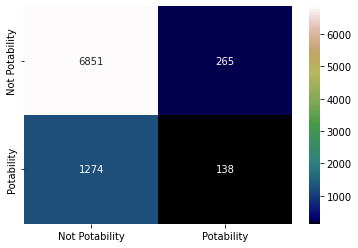

In [192]:
matriz3 = confusion_matrix(y_test,y_pred)
print('Matriz de Confusión')
print(matriz3)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz3.flatten()/np.sum(matriz3)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(matriz3, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='gist_earth')
plt.show()

## K-Nearest Neighbor KNN

In [201]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors = 2, p = 2, metric='minkowski')
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
print('Precisión del vecino más cercano: ', model4.score(x_train, y_train))
print('Precisión de las pruebas: ', model4.score(x_test, y_test)*100)

Precisión del vecino más cercano:  0.8891853067925303
Precisión de las pruebas:  81.95356472795497


Matriz de Confusión
[[6851  265]
 [1274  138]]


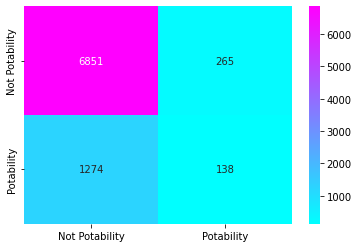

In [196]:
matriz4 = confusion_matrix(y_test,y_pred)
print('Matriz de Confusión')
print(matriz4)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz4.flatten()/np.sum(matriz4)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Potability', 'Potability']
dataframe = pd.DataFrame(matriz4, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='cool')
plt.show()

# Conclusiones

- Como pudimos apreciar el modelo SVM y Regression Logistic tienen los porcentajes más altos respecto a los demás.

- también se puede resaltar que todos están por encima del 80% por lo que esto es bastante bueno

- Finalmente se afirma que a pesar de que algunos modelos esten por encima del 80% se puede buscar llegar al mejor modelo posible. Pero sin embargo hay que revisar los sobreajustes o subajustes que se generen

# Realizado por:

```
 Juan Diego Castellanos - Systems Engineer 

```

